In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Loading the data
df = pd.read_excel('/content/drive/MyDrive/Projects/Anemia/All Datasets/Alltogether/Oyshi/anemia_dataset_190901.xlsx')

In [ ]:
df.head()

,Name,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,dir,Avg Blue pixel,Avg Green pixel,...,%Val,Avg Hue,Avg Sat,Avg Val,%L,%A,%B,Avg L,Avg A,Avg B
0,abdurrahim,M,44.088531,29.022819,26.888650,14.1,no,/content/Data/Train/0/45.abdurrahim.png,77.070863,83.188028,...,67.335317,9.009385,52.293784,126.370989,25.862610,37.762762,36.374628,98.216777,143.409223,138.137595
1,abdurrahim1,M,48.473078,26.516789,25.010133,15.6,no,/content/Data/Train/0/49.abdurrahim1.png,51.862468,54.986757,...,60.914580,11.807232,52.689180,100.517582,20.228054,40.899093,38.872853,71.715169,145.000864,137.817169
2,abir,M,44.273498,28.266747,27.459755,14.0,no,/content/Data/Train/0/75.abir.png,41.335589,42.550366,...,60.521035,15.870453,27.604431,66.646758,15.956140,42.685349,41.358511,51.166521,136.879021,132.624252
3,ajmal,M,46.755707,28.177323,25.066969,14.0,no,/content/Data/Train/0/87.ajmal.png,38.495695,43.272309,...,57.005261,6.852037,47.382002,71.907067,16.260561,42.317215,41.422224,53.086448,138.154561,135.232653
4,akash,M,46.972504,28.358716,24.668780,12.8,no,/content/Data/Train/0/38.akash.png,22.708450,26.105161,...,63.139464,2.031160,23.212184,43.240044,10.778942,44.852423,44.368635,32.241887,134.162217,132.715115


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             420 non-null    object 
 1   Sex              321 non-null    object 
 2   %Red Pixel       420 non-null    float64
 3   %Green pixel     420 non-null    float64
 4   %Blue pixel      420 non-null    float64
 5   Hb               321 non-null    float64
 6   Anaemic          420 non-null    object 
 7   dir              420 non-null    object 
 8   Avg Blue pixel   420 non-null    float64
 9   Avg Green pixel  420 non-null    float64
 10  Avg Red Pixel    420 non-null    float64
 11  %Hue             420 non-null    float64
 12  %Sat             420 non-null    float64
 13  %Val             420 non-null    float64
 14  Avg Hue          420 non-null    float64
 15  Avg Sat          420 non-null    float64
 16  Avg Val          420 non-null    float64
 17  %L              

In [ ]:
df['Anaemic'].describe() #129 yes

count     420
unique      2
top        no
freq      275
Name: Anaemic, dtype: object

In [ ]:
df['Anaemic'].unique()

array(['no', 'yes'], dtype=object)

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>

* Only the 'diagnosis' column, which we have to predict is of object datatype.
* There's only ID column of int type. We will probably drop it anyway.
* There are a total of 31 columns which are of float datatype.

In [ ]:
df.drop(['Name','Sex','Hb','dir'], axis = 1 , inplace=True)
df.columns

Index(['%Red Pixel', '%Green pixel', '%Blue pixel', 'Anaemic',
       'Avg Blue pixel', 'Avg Green pixel', 'Avg Red Pixel', '%Hue', '%Sat',
       '%Val', 'Avg Hue', 'Avg Sat', 'Avg Val', '%L', '%A', '%B', 'Avg L',
       'Avg A', 'Avg B'],
      dtype='object')

In [ ]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Anaemic,Avg Blue pixel,Avg Green pixel,Avg Red Pixel,%Hue,%Sat,%Val,Avg Hue,Avg Sat,Avg Val,%L,%A,%B,Avg L,Avg A,Avg B
0,44.088531,29.022819,26.888650,no,77.070863,83.188028,126.370835,4.800547,27.864137,67.335317,9.009385,52.293784,126.370989,25.862610,37.762762,36.374628,98.216777,143.409223,138.137595
1,48.473078,26.516789,25.010133,no,51.862468,54.986757,100.516596,7.155291,31.930128,60.914580,11.807232,52.689180,100.517582,20.228054,40.899093,38.872853,71.715169,145.000864,137.817169
2,44.273498,28.266747,27.459755,no,41.335589,42.550366,66.645573,14.411748,25.067217,60.521035,15.870453,27.604431,66.646758,15.956140,42.685349,41.358511,51.166521,136.879021,132.624252
3,46.755707,28.177323,25.066969,no,38.495695,43.272309,71.803393,5.432041,37.562698,57.005261,6.852037,47.382002,71.907067,16.260561,42.317215,41.422224,53.086448,138.154561,135.232653
4,46.972504,28.358716,24.668780,no,22.708450,26.105161,43.239785,2.965917,33.894620,63.139464,2.031160,23.212184,43.240044,10.778942,44.852423,44.368635,32.241887,134.162217,132.715115


<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
After dropping the two columns, we are now left with 31 columns. Let us see how well do they correlate with the diagnosis column. 

In [ ]:
df.Anaemic.replace({"yes":1.00,"no":0.00},inplace=True)
df.Anaemic.unique()

array([0., 1.])

In [ ]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Anaemic,Avg Blue pixel,Avg Green pixel,Avg Red Pixel,%Hue,%Sat,%Val,Avg Hue,Avg Sat,Avg Val,%L,%A,%B,Avg L,Avg A,Avg B
0,44.088531,29.022819,26.888650,0.0,77.070863,83.188028,126.370835,4.800547,27.864137,67.335317,9.009385,52.293784,126.370989,25.862610,37.762762,36.374628,98.216777,143.409223,138.137595
1,48.473078,26.516789,25.010133,0.0,51.862468,54.986757,100.516596,7.155291,31.930128,60.914580,11.807232,52.689180,100.517582,20.228054,40.899093,38.872853,71.715169,145.000864,137.817169
2,44.273498,28.266747,27.459755,0.0,41.335589,42.550366,66.645573,14.411748,25.067217,60.521035,15.870453,27.604431,66.646758,15.956140,42.685349,41.358511,51.166521,136.879021,132.624252
3,46.755707,28.177323,25.066969,0.0,38.495695,43.272309,71.803393,5.432041,37.562698,57.005261,6.852037,47.382002,71.907067,16.260561,42.317215,41.422224,53.086448,138.154561,135.232653
4,46.972504,28.358716,24.668780,0.0,22.708450,26.105161,43.239785,2.965917,33.894620,63.139464,2.031160,23.212184,43.240044,10.778942,44.852423,44.368635,32.241887,134.162217,132.715115


<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
In order to conduct our analysis easily, we have converted the target column as:

* Yes - 1
* No - 0

Text(0.5, 1.0, 'Correlation Map')

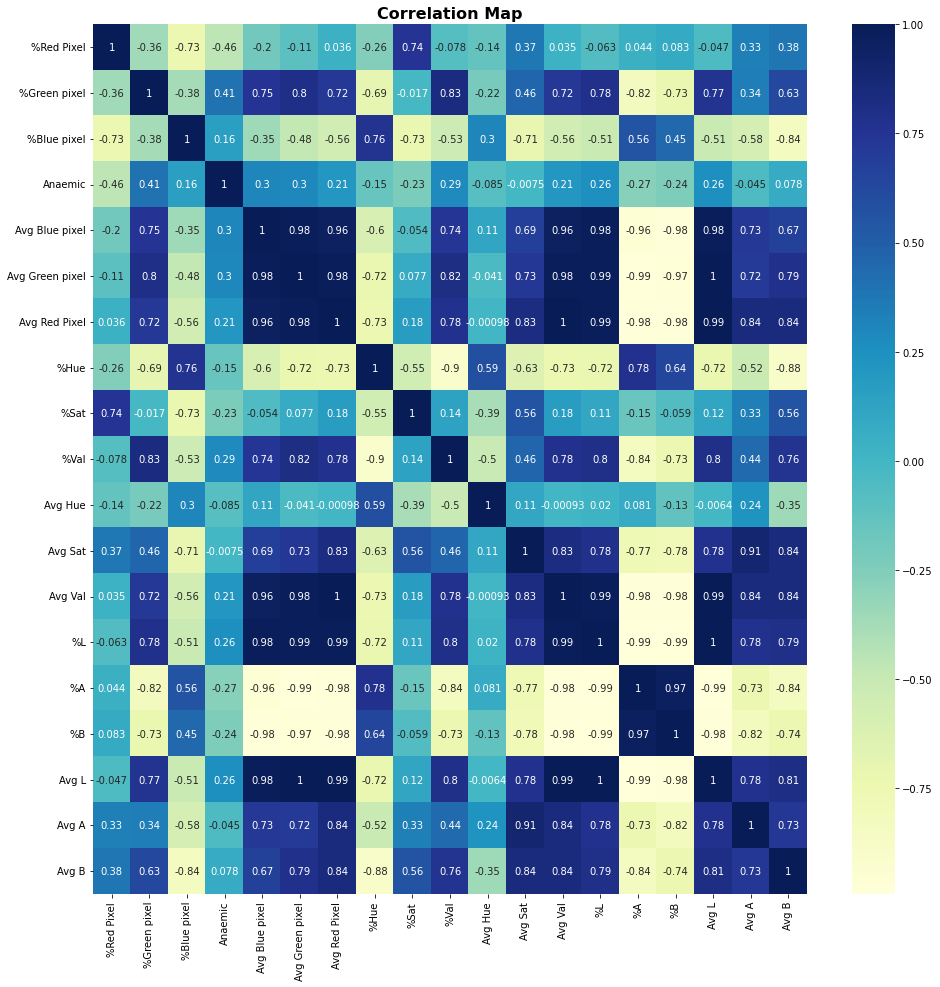

In [ ]:
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

In [ ]:
corr[abs(corr['Anaemic']) > 0.23].index

Index(['%Red Pixel', '%Green pixel', 'Anaemic', 'Avg Blue pixel',
       'Avg Green pixel', '%Sat', '%Val', '%L', '%A', '%B', 'Avg L'],
      dtype='object')

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
The following columns are the one's that show the greatest correlation with our diagnosis column. There are two things that can be done. 
* We can either use only the columns which have greatest correlation, or we can continue to use all the columns.
* I will be using all these columns to predict our result
* You can eliminate a few and see if the accuracy improves!

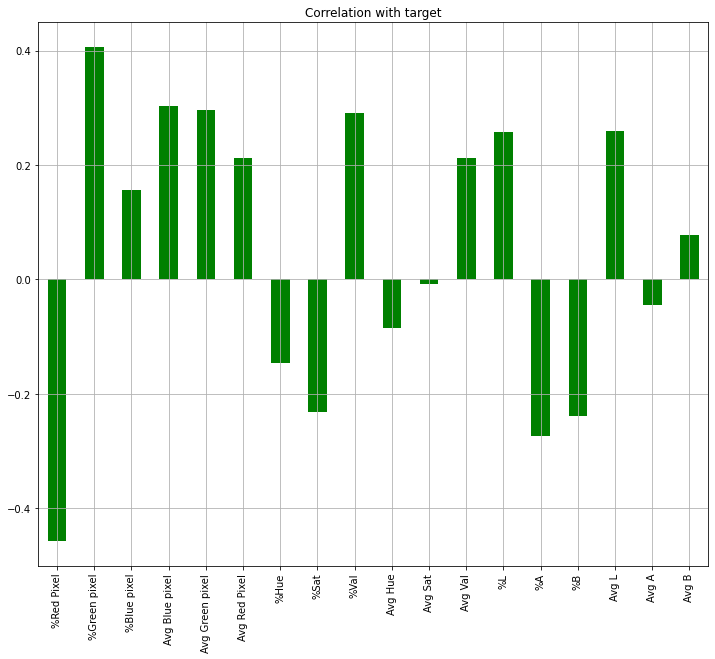

In [ ]:
df.drop('Anaemic', axis=1).corrwith(df.Anaemic).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
Looks wonderful, isn't it! 
* There are only a handful of columns that show negative correlation with the 'diagnosis column'
* Around half of our columns are more than 50% positively correlated to diagnosis column.

We have to select which of the attributes we want to use in building our model!


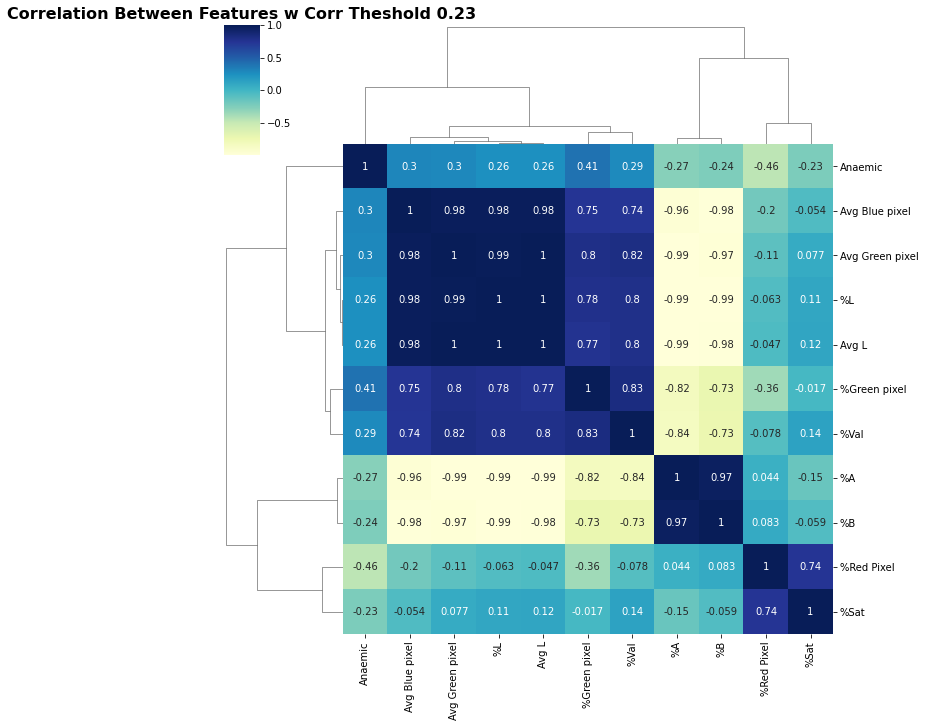

In [ ]:
corr_matrix = df.corr()
threshold = 0.23
filtre = np.abs(corr_matrix["Anaemic"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.23", fontweight = "bold", fontsize=16)
plt.show()

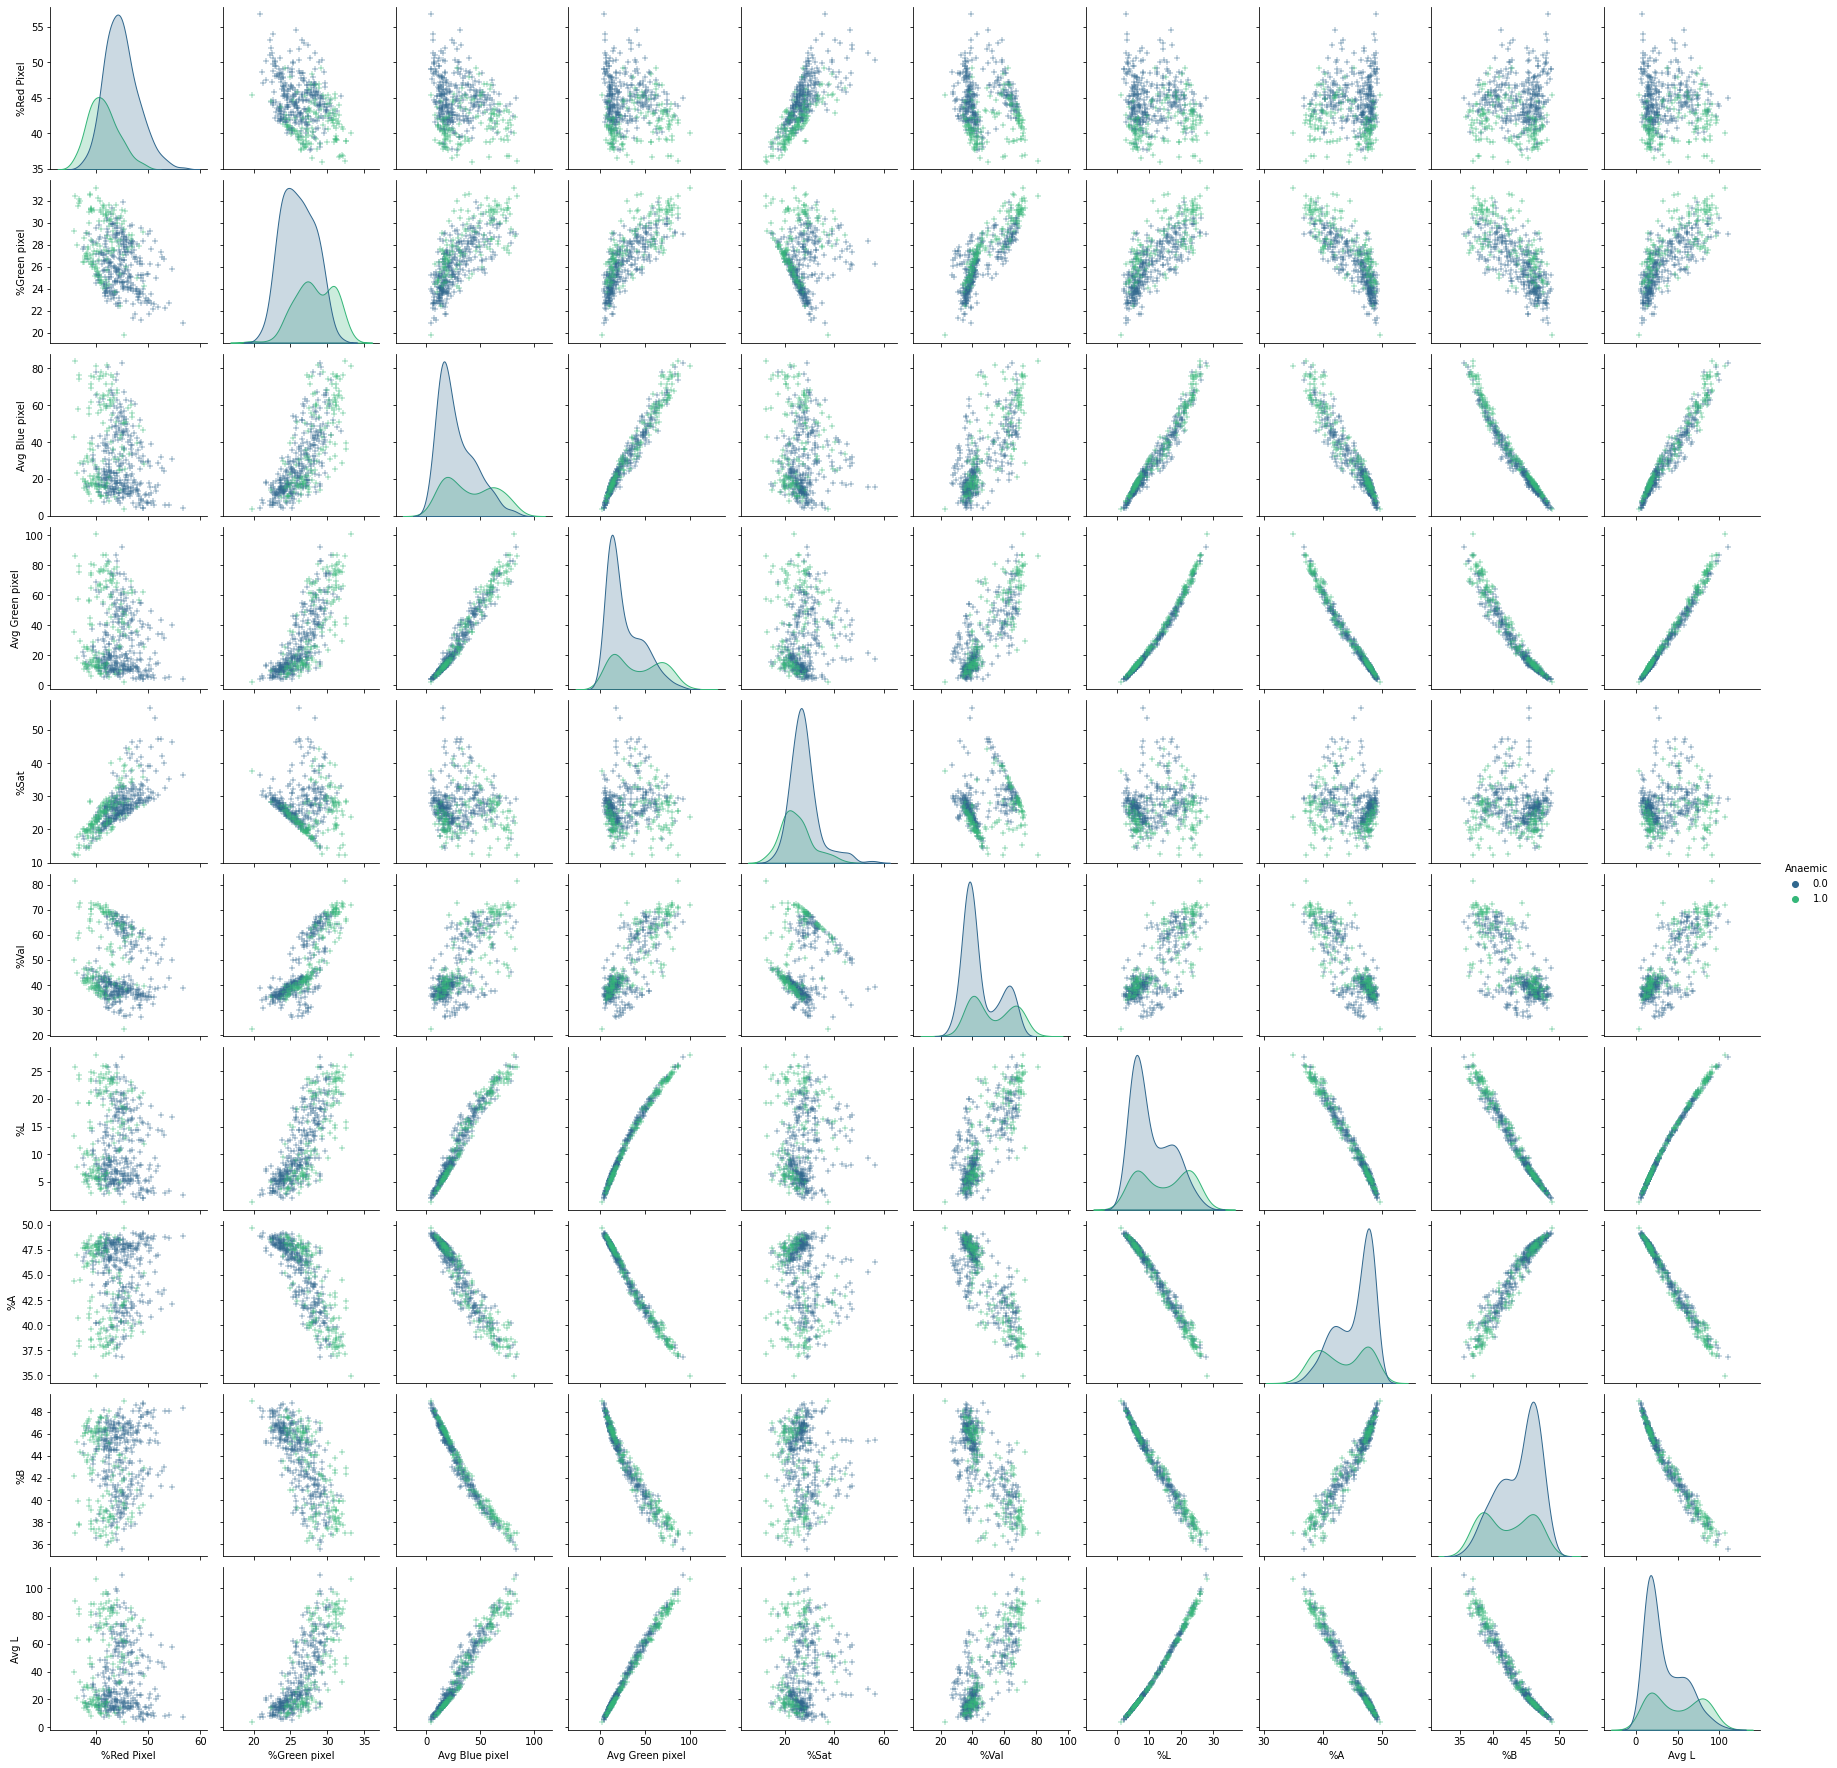

In [ ]:
#pair plot
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "Anaemic", palette='viridis')
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
We would need to eliminate the outliers so that it does not affects our model's accuracy. Let us see if there are any outliers present in the dataset!

**About The Local Outlier Factor**

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=df["Anaemic"]
X=df.drop(["Anaemic"],axis=1)
columns= df.columns.tolist()

In [ ]:
df.head()


,%Red Pixel,%Green pixel,%Blue pixel,Anaemic,Avg Blue pixel,Avg Green pixel,Avg Red Pixel,%Hue,%Sat,%Val,Avg Hue,Avg Sat,Avg Val,%L,%A,%B,Avg L,Avg A,Avg B
0,44.088531,29.022819,26.888650,0.0,77.070863,83.188028,126.370835,4.800547,27.864137,67.335317,9.009385,52.293784,126.370989,25.862610,37.762762,36.374628,98.216777,143.409223,138.137595
1,48.473078,26.516789,25.010133,0.0,51.862468,54.986757,100.516596,7.155291,31.930128,60.914580,11.807232,52.689180,100.517582,20.228054,40.899093,38.872853,71.715169,145.000864,137.817169
2,44.273498,28.266747,27.459755,0.0,41.335589,42.550366,66.645573,14.411748,25.067217,60.521035,15.870453,27.604431,66.646758,15.956140,42.685349,41.358511,51.166521,136.879021,132.624252
3,46.755707,28.177323,25.066969,0.0,38.495695,43.272309,71.803393,5.432041,37.562698,57.005261,6.852037,47.382002,71.907067,16.260561,42.317215,41.422224,53.086448,138.154561,135.232653
4,46.972504,28.358716,24.668780,0.0,22.708450,26.105161,43.239785,2.965917,33.894620,63.139464,2.031160,23.212184,43.240044,10.778942,44.852423,44.368635,32.241887,134.162217,132.715115


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   %Red Pixel       420 non-null    float64
 1   %Green pixel     420 non-null    float64
 2   %Blue pixel      420 non-null    float64
 3   Anaemic          420 non-null    float64
 4   Avg Blue pixel   420 non-null    float64
 5   Avg Green pixel  420 non-null    float64
 6   Avg Red Pixel    420 non-null    float64
 7   %Hue             420 non-null    float64
 8   %Sat             420 non-null    float64
 9   %Val             420 non-null    float64
 10  Avg Hue          420 non-null    float64
 11  Avg Sat          420 non-null    float64
 12  Avg Val          420 non-null    float64
 13  %L               420 non-null    float64
 14  %A               420 non-null    float64
 15  %B               420 non-null    float64
 16  Avg L            420 non-null    float64
 17  Avg A           

In [ ]:
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:19]
#  1 = inlier
# -1 = outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1])

**<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
:** 
So there are 3 columns that have outliers, lets plot them and check them out!

In [ ]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

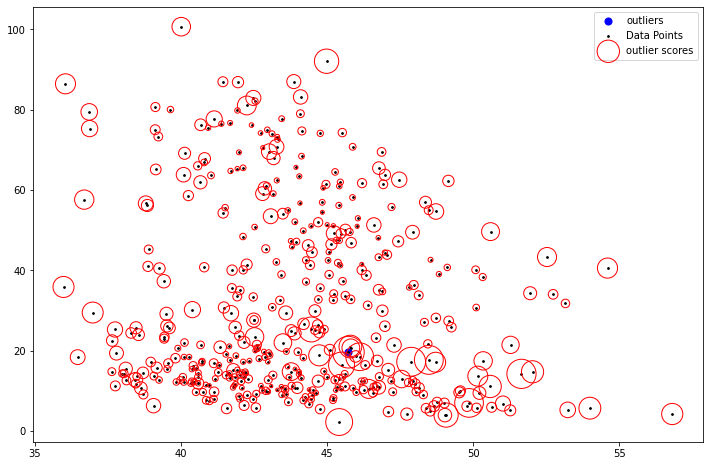

In [ ]:
plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,0],X.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend();

In [ ]:
X= X.drop(outlier_index)
y= y.drop(outlier_index).values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 5, weights ='uniform'), SVC(kernel="rbf",random_state=24), DecisionTreeClassifier(random_state=24), RandomForestClassifier(n_estimators=60, random_state=10), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'SVC': SVC(random_state=24),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=24),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=10),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier()}

In [ ]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8333333333333334
KNeighborsClassifier 0.8333333333333334
SVC 0.8571428571428571
DecisionTreeClassifier 0.7023809523809523
RandomForestClassifier 0.8214285714285714
GradientBoostingClassifier 0.8452380952380952
AdaBoostClassifier 0.7857142857142857
XGBClassifier 0.8571428571428571


In [ ]:
sns.set(font_scale=2)

Text(0.5, 1.0, 'Plotting the Model Accuracies')

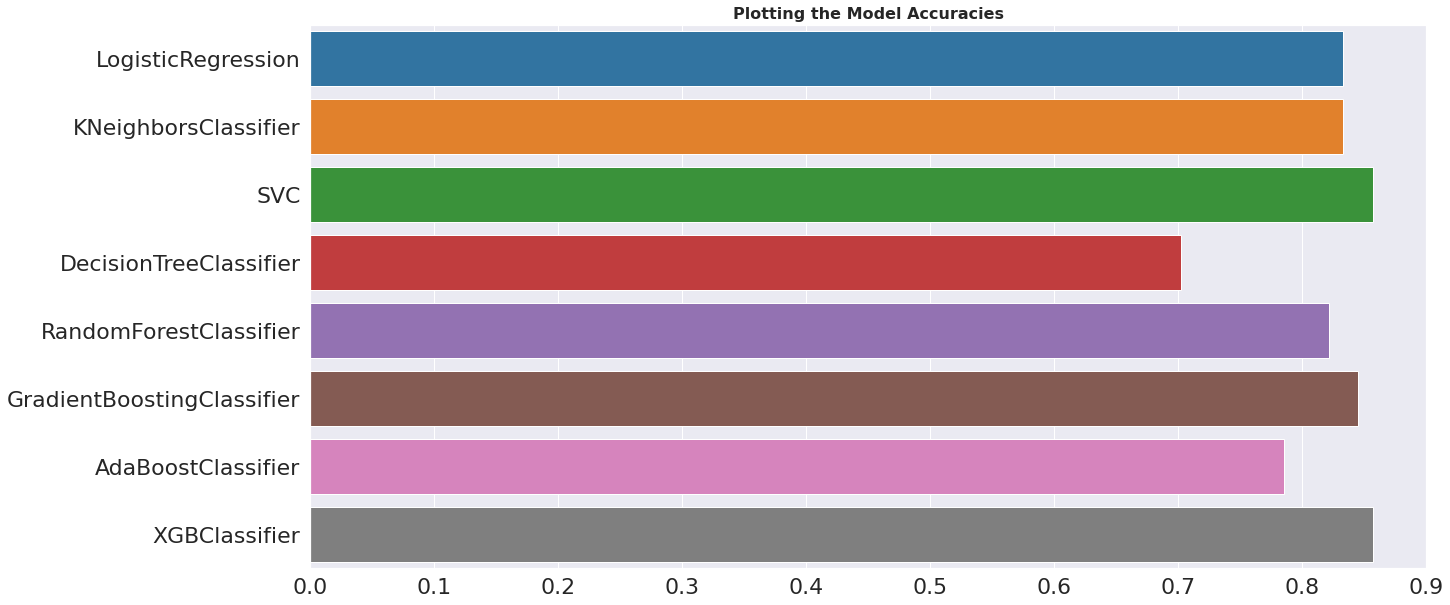

In [ ]:
plt.figure(figsize = (20,10))
a = sns.barplot(x = predicted, y = key, palette='tab10')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [ ]:
fig = a.get_figure()
fig.savefig("out.png", dpi=300) 

In [ ]:
## Ensemble

from sklearn.ensemble import VotingClassifier
LogReg_clf = LogisticRegressionCV()
rt_clf =   RandomForestClassifier(n_estimators=60, class_weight='balanced')
SVC_clf = SVC(kernel="rbf")
adab = AdaBoostClassifier()
xgboost = xgb.XGBClassifier(random_state=0,booster="gbtree")
knnb = KNeighborsClassifier(n_neighbors = 5, weights ='uniform')


# voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('LogReg', LogReg_clf),('RF', rt_clf), ('Ada', adab), ('XGB', xgb)], voting='hard')
voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('LogReg', LogReg_clf),('RF', rt_clf),  ('XGB', xgboost)], voting='hard',verbose=True)

voting_clf.fit(X_train, y_train)

print("\n\nAccuracy on test set")
predict = voting_clf.predict(X_test)
acc = accuracy_score(y_test, predict)
print(acc)

[Voting] ...................... (1 of 4) Processing SVC, total=   0.0s
[Voting] ................... (2 of 4) Processing LogReg, total=   0.9s
[Voting] ....................... (3 of 4) Processing RF, total=   0.1s
[Voting] ...................... (4 of 4) Processing XGB, total=   0.1s


Accuracy on test set
0.8809523809523809


In [ ]:
plt.savefig("results.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))
print("\nPrecison : ",precision_score(y_test, predict, average = 'weighted'))
print("\nRecall : ",recall_score(y_test, predict,  average = 'weighted'))
print("\nF1 : ",f1_score(y_test, predict,  average = 'weighted'))

[[54  3]
 [ 7 20]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        57
         1.0       0.87      0.74      0.80        27

    accuracy                           0.88        84
   macro avg       0.88      0.84      0.86        84
weighted avg       0.88      0.88      0.88        84


Precison :  0.8802056817024744

Recall :  0.8809523809523809

F1 :  0.8782082324455206


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True, 
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        # group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        group_percentages = ["{0:.2%}".format(value) for value in np.array([cf/np.sum(cf) for cf in cf]).flatten()]

    else:
        group_percentages = blanks
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]


    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories, annot_kws={"size":13})
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.xticks(rotation=0)
        plt.yticks(rotation=45)
        plt.savefig('filename.png', dpi=300)
    else:
        plt.xlabel(stats_text)
        plt.savefig('filename.png', dpi=300)
    if title:
        plt.title(title)
        plt.savefig('filename.png', dpi=300)

# make_confusion_matrix(cnf, figsize=(6,4),count=False,categories=classes,percent=True,cbar=True,cmap='Blues')

In [ ]:
cnf = confusion_matrix(y_test, predict)
cnf

array([[54,  3],
       [ 7, 20]])

In [ ]:
cnf = np.array([[58,  3],
       [ 4, 19]])

In [ ]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

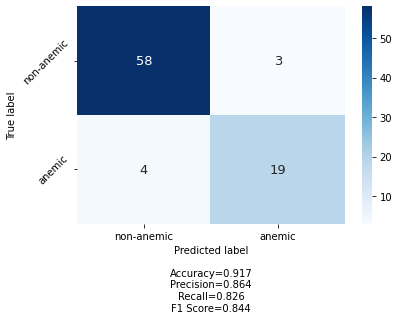

In [ ]:
classes = ['non-anemic', 'anemic']
make_confusion_matrix(cnf, figsize=(6,4),count=False,categories=classes,percent=False,cbar=True,cmap='Blues')

In [ ]:
plt.savefig("conf.png")

<Figure size 432x288 with 0 Axes>

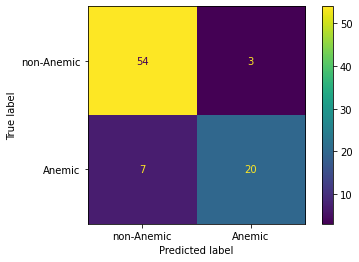

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(voting_clf, X_test, y_test, display_labels=["non-Anemic", "Anemic"])  

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
We can clearly see that all our models perform with more than 90% accuracy where DecisionTreeClassifier has the lowest of 90.058% and LogisticRegression has the highest of 98.25% accuracy.

Let us see if we can further improve the accuracy of our model by adding a few changes to it!


# New Section

In [ ]:
# lr = LogisticRegression(solver='lbfgs', max_iter=10000)
# rs = []
# acc = []
# for i in range(1,25,1):
#     X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
#     model_lr_rs = lr.fit(X_train, y_train)
#     predict_values_lr_rs = model_lr_rs.predict(X_test)
#     acc.append(accuracy_score(y_test, predict_values_lr_rs))
#     rs.append(i)

1 0.8452380952380952
2 0.8333333333333334
3 0.7857142857142857
4 0.7976190476190477
5 0.7619047619047619
6 0.8333333333333334
7 0.8333333333333334
8 0.7976190476190477
9 0.8095238095238095
10 0.7976190476190477
11 0.8333333333333334
12 0.7142857142857143
13 0.7738095238095238
14 0.8214285714285714
15 0.8690476190476191
16 0.8095238095238095
17 0.7857142857142857
18 0.8452380952380952
19 0.7619047619047619
20 0.7857142857142857
21 0.7857142857142857
22 0.7976190476190477
23 0.8452380952380952
24 0.8928571428571429


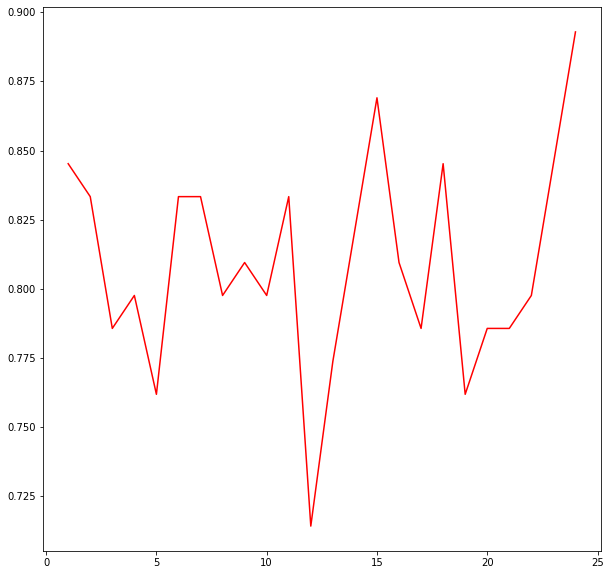

In [ ]:
# plt.figure(figsize=(10,10))
# plt.plot(rs, acc, color ='red')

# for i in range(len(rs)):
#     print(rs[i],acc[i])


From the above figure we can see that our model touches somewhere around 99% between (20-25). Let's try to see where exactly does this happen!

In [ ]:
# for i in range(0,24):
#     if acc[i] > 0.80:
#         print(acc[i])

0.8452380952380952
0.8333333333333334
0.8333333333333334
0.8333333333333334
0.8095238095238095
0.8333333333333334
0.8214285714285714
0.8690476190476191
0.8095238095238095
0.8452380952380952
0.8452380952380952
0.8928571428571429


![image.png](attachment:a530fc48-7806-483c-9049-9b86635fd7bd.png)

> *Thanks a lot for checking this out till the end!*